# Andrew Nell
# HW10 Assignment 1

# Import Packages

In [495]:
import numpy as np
import matplotlib as plt
import pandas as pd
import statsmodels.api as sm
%pylab inline

# Alpha = 0.05

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'plt', 'array']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# TIME SERIES ANALYSIS

# Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

## DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.


The data was organized  by Dr. Sina Kashuk at CUSP.
You can get it from the github repo (use the download link to download it live in your notebook). 
It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


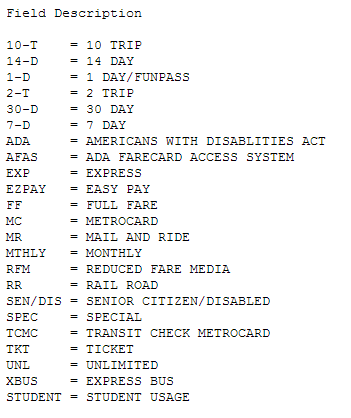

In [2]:
from IPython.display import Image
Image(filename = "Ridetypes.png")

## Each time series (per station, per ticket type) contains the number of swipes per week for 194 weeks from 05/21/2010 to 02/21/2014. 

The data are available to you as a *python data cube*. you can load it as 

```
np.load(“MTA_Fare.npy")
```

and you will end up with a python numpy array of 
shape (600, 23, 194)




In [5]:
MTA = np.load('MTA_Fare.npy')
MTA

array([[[56961, 64703, 68002, ..., 36527, 33929, 36824],
        [ 1732,  2083,  2107, ...,  1264,  1172,  1238],
        [  203,   276,   245, ...,   186,   167,   167],
        ..., 
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [   -1,    -1,    -1, ...,  1121,  1377,   712]],

       [[16210, 20179, 21769, ...,    -1,    -1,    -1],
        [  503,   647,   665, ...,    -1,    -1,    -1],
        [   41,    43,    44, ...,    -1,    -1,    -1],
        ..., 
        [    0,     0,     0, ...,    -1,    -1,    -1],
        [    0,     0,     0, ...,    -1,    -1,    -1],
        [   -1,    -1,    -1, ...,    -1,    -1,    -1]],

       [[ 3292,  3429,  3629, ...,  3746,  3406,  3217],
        [  110,    92,   102, ...,   212,   209,   211],
        [    7,     6,    13, ...,    26,    20,    22],
        ..., 
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0, 

In [38]:
MTA.shape

(600, 23, 194)

In [148]:
# Format and Clean Data
# Convert data to floats
MTA = MTA.astype(float)

# change -1 to NaN
np.place(MTA,MTA==-1.0,np.nan)
MTA

array([[[  5.69610000e+04,   6.47030000e+04,   6.80020000e+04, ...,
           3.65270000e+04,   3.39290000e+04,   3.68240000e+04],
        [  1.73200000e+03,   2.08300000e+03,   2.10700000e+03, ...,
           1.26400000e+03,   1.17200000e+03,   1.23800000e+03],
        [  2.03000000e+02,   2.76000000e+02,   2.45000000e+02, ...,
           1.86000000e+02,   1.67000000e+02,   1.67000000e+02],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [             nan,              nan,              nan, ...,
           1.12100000e+03,   1.37700000e+03,   7.12000000e+02]],

       [[  1.62100000e+04,   2.01790000e+04,   2.17690000e+04, ...,
                      nan,              nan,              nan],
        [  5.03000000e+02,   6.47000000e+02,   6.65000000e+0

In [159]:
# Create Date Data set
start  = '05/21/2010'
end = "02/21/2014"

# Create variable for dates starting from start date with 194 weeks after
dates = []
startdate = np.datetime64('2014-02-21')
for i in range(194):
    dates.append(startdate - (i * 7))

dates.reverse()
    
# Check Dates array
dates

# It appears that there are some weeks missing, 194 does not add up to the appropriate end date

[numpy.datetime64('2010-06-11'),
 numpy.datetime64('2010-06-18'),
 numpy.datetime64('2010-06-25'),
 numpy.datetime64('2010-07-02'),
 numpy.datetime64('2010-07-09'),
 numpy.datetime64('2010-07-16'),
 numpy.datetime64('2010-07-23'),
 numpy.datetime64('2010-07-30'),
 numpy.datetime64('2010-08-06'),
 numpy.datetime64('2010-08-13'),
 numpy.datetime64('2010-08-20'),
 numpy.datetime64('2010-08-27'),
 numpy.datetime64('2010-09-03'),
 numpy.datetime64('2010-09-10'),
 numpy.datetime64('2010-09-17'),
 numpy.datetime64('2010-09-24'),
 numpy.datetime64('2010-10-01'),
 numpy.datetime64('2010-10-08'),
 numpy.datetime64('2010-10-15'),
 numpy.datetime64('2010-10-22'),
 numpy.datetime64('2010-10-29'),
 numpy.datetime64('2010-11-05'),
 numpy.datetime64('2010-11-12'),
 numpy.datetime64('2010-11-19'),
 numpy.datetime64('2010-11-26'),
 numpy.datetime64('2010-12-03'),
 numpy.datetime64('2010-12-10'),
 numpy.datetime64('2010-12-17'),
 numpy.datetime64('2010-12-24'),
 numpy.datetime64('2010-12-31'),
 numpy.dat

## Task 1: 
### Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
### Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.

In [295]:
# Remove Ticket Type Swipes
stations = np.nansum(MTA,axis=1)
stations.shape

(600, 194)

In [296]:
# Get total swipes per week
total = np.nansum(stationstot,axis=0)

Text(0.5,1,'')

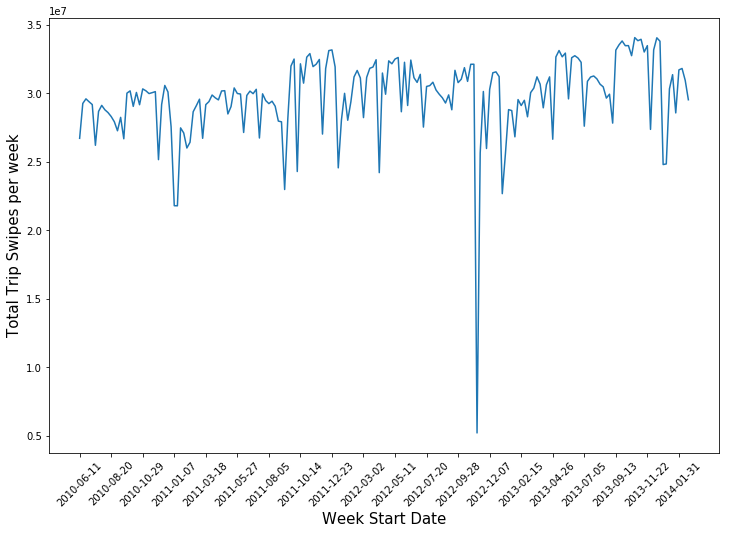

In [297]:
plt.figure(figsize=(12,8))

plt.plot(total);
plt.xticks(arange(0,194,10), dates[::10], rotation=45 );
plt.xlabel('Week Start Date',fontsize=15)
plt.ylabel('Total Trip Swipes per week',fontsize=15)
plt.title('')


#### Figure 1: Plot of total ridership over the time period 
This allows us to visibly see any major events and general fluctuations in ridership. There is a clear event around end of September that appears significant

In [294]:
# Calculate mean and standard deviation of swipes
total_mean = np.mean(weeks)
total_std = np.std(weeks)

# Determine values at 3 standard deviations away
totalsigma3 = np.where(weeks <= (total_mean - (total_std * 3)))

# Print actual date
print('The week at which the major event occurs is ' + str(dates[sigma3[0][0]]))

The week at which the major event occurs is 2012-11-09


The date is close to Hurricane Sandy, although it appears that we are missing several weeks and the actual date may be slightly off. As there actually 196 weeks between the specifed dates.

## Task 2: 
### Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

In [511]:
ridership = np.nansum(MTA,axis=0)
ridershipmean = np.nansum(MTA,axis=0)
ridership

array([[  1.14946150e+07,   1.25268590e+07,   1.27666270e+07, ...,
          1.31896100e+07,   1.25007560e+07,   1.24599470e+07],
       [  5.30524000e+05,   5.83533000e+05,   5.86194000e+05, ...,
          6.95134000e+05,   6.70228000e+05,   6.79497000e+05],
       [  4.78010000e+04,   5.14860000e+04,   5.16360000e+04, ...,
          5.87710000e+04,   5.65250000e+04,   5.51920000e+04],
       ..., 
       [  6.12800000e+03,   6.12000000e+03,   6.49000000e+03, ...,
          5.39800000e+03,   5.75900000e+03,   6.18400000e+03],
       [  3.58000000e+02,   4.74000000e+02,   4.65000000e+02, ...,
          8.62000000e+02,   8.10000000e+02,   8.20000000e+02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.13272300e+06,   1.37940300e+06,   5.35018000e+05]])

In [512]:
ridetype = np.array(['10 Trip','14 Day','1 Day/Funpass','2 Trip',
                     '30 Day','7 Day','American with Disbilities Act',
                     'ADA Farecard Access System','Express','Easy Pay',
                     'Full Fare','Metrocard','Mail and Ride','Monthly',
                     'Reduced Fare Media','Rail Road','Senior Citizen/Disabled',
                     'Special','Transit Check Metrocard','Ticket','Unlimeted',
                     'Express Bus','Student Usage'])

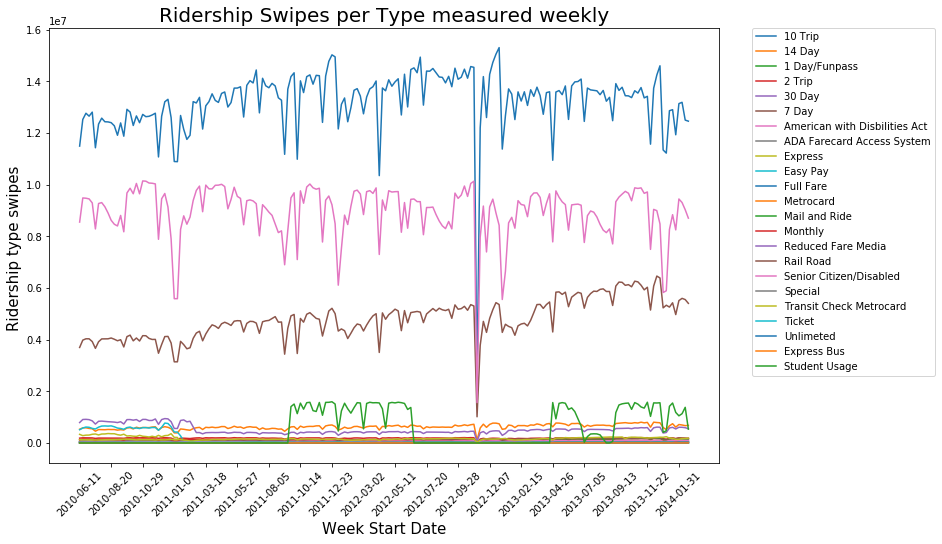

In [513]:
plt.figure(figsize=(12,8))

plt.plot((ridership.T));
plt.xticks(arange(0,194,10), dates[::10], rotation=45 );
plt.xlabel('Week Start Date',fontsize=15)
plt.ylabel('Ridership type swipes ',fontsize=15)
plt.title('Ridership Swipes per Type measured weekly',fontsize=20)
plt.legend(ridetype,bbox_to_anchor=(1.05, 1), loc=2, 
           borderaxespad=0.)

#### Figure 2: Ridership swipers per Type measured weekly
There appears to be some variation n a lot of the features, but these are skewed by some of the larger features. If we log the data we can potnetially have a clearer view of all ridership types


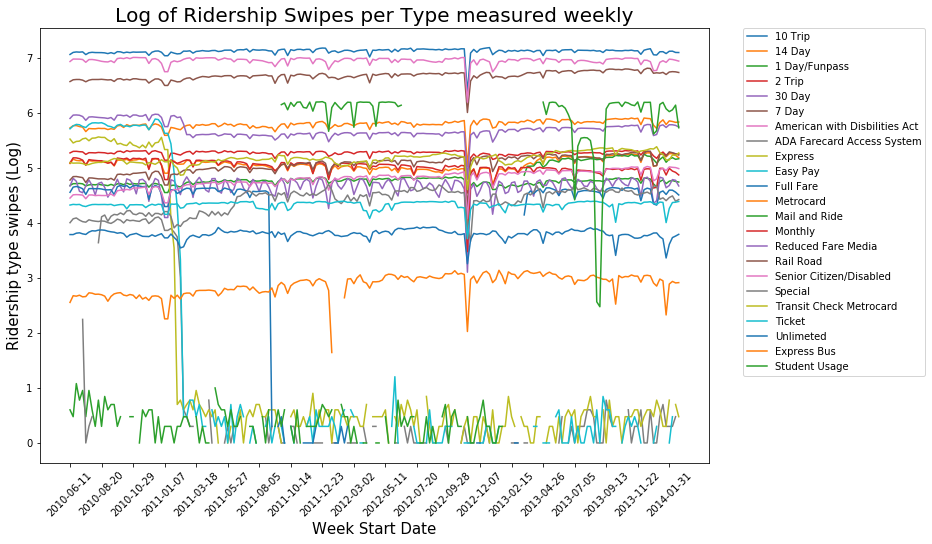

In [514]:
plt.figure(figsize=(12,8))

plt.plot(np.log10(ridership.T));
plt.xticks(arange(0,194,10), dates[::10], rotation=45 );
plt.xlabel('Week Start Date',fontsize=15)
plt.ylabel('Ridership type swipes (Log)',fontsize=15)
plt.title('Log of Ridership Swipes per Type measured weekly',fontsize=20)
plt.legend(ridetype,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Figure 3: Log of Ridership swipers per Type measured weekly
Logging the data rpovides a clearer view on all data sets, however hides some of the fluctuations. We can see that most of the data sees small fluctuations, with some losing data at various points. For instance, it appears that student usage sees step changes for large portions of the time period. While express,ADA  FArecard Access System and easy pay completely drop off around January 2011. 

Student usage also appears to have a big drop off in Summer in 2013, when school is not in session. 

There are several types that do not have many riders consistently and fluctuate between being used and not at all. 

There are clearly some data points missing as not all data makes sense and there are several drops in particular data sets at set times.


In [515]:
# Define first and last 10
First10 = (ridership.T)[:10]
Last10 = (ridership.T)[-10:]

# Determine means for each 10 and ridership type
First10mean = np.nanmean(First10,axis=0)
Last10mean = np.nanmean(Last10,axis=0)

# Compare first and last
FirstVsLast =  1 - (First10mean/Last10mean) 

# Create data frame to view
FirstVLastdf = pd.DataFrame({'Type':ridetype,'Percentage Change':np.around((FirstVsLast*100), decimals=2),'First 10 mean':First10mean,'Last 10 mean':Last10mean})

In [516]:
FirstVLastdf.sort('Percentage Change',ascending=False)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,First 10 mean,Last 10 mean,Percentage Change,Type
22,0.0,1068539.6,100.00,Student Usage
12,5.8,143752.6,100.00,Mail and Ride
17,454.0,31862.8,98.58,Special
16,31208.6,90798.2,65.63,Senior Citizen/Disabled
15,64516.0,167287.4,61.43,Rail Road
21,476.2,791.6,39.84,Express Bus
18,120860.6,185191.2,34.74,Transit Check Metrocard
5,3934303.6,5467689.0,28.04,7 Day
1,533376.2,667821.7,20.13,14 Day
11,131889.7,160053.5,17.60,Metrocard


There are some major increases and decreases, with ADA FArecard Access, Express and Easy Pay all appearing to move down to zero over the period. It also appears that Student Usage had not started in 2010 and was introduced over the time period, with a huge increase in mail and ride and Special, which were almost non-existant in 2010.

There have also been substantial (above 20% increases) in Senior Citizens/Disabled, Rail ROad, Express Bus, Transit Check Metrocard, 7 day and 14 day ridership types.

Some appeared to stay relatively steady (between -5 and 5 % changes) including Ticket, 10 Trip, 30 day.

There were also some clear ridership types that have decreased, most notably Full Fare, Unlimited, Reduced Fare Media and Monthly.

In [518]:
Ridershipdf = pd.DataFrame(ridershipmean.T)

In [519]:
for i in range(23):
    Ridershipdf[i] = pd.rolling_mean(Ridershipdf[i], 10)
    
Ridershipdf.head(10)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
  from ipykernel import kernelapp as app


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,12347326.1,533376.2,49898.9,190627.5,47956.2,3934303.6,9117571.2,10981.3,327499.7,599218.7,...,137296.4,844028.3,64516.0,31208.6,454.0,120860.6,21131.1,6626.3,476.2,0.0


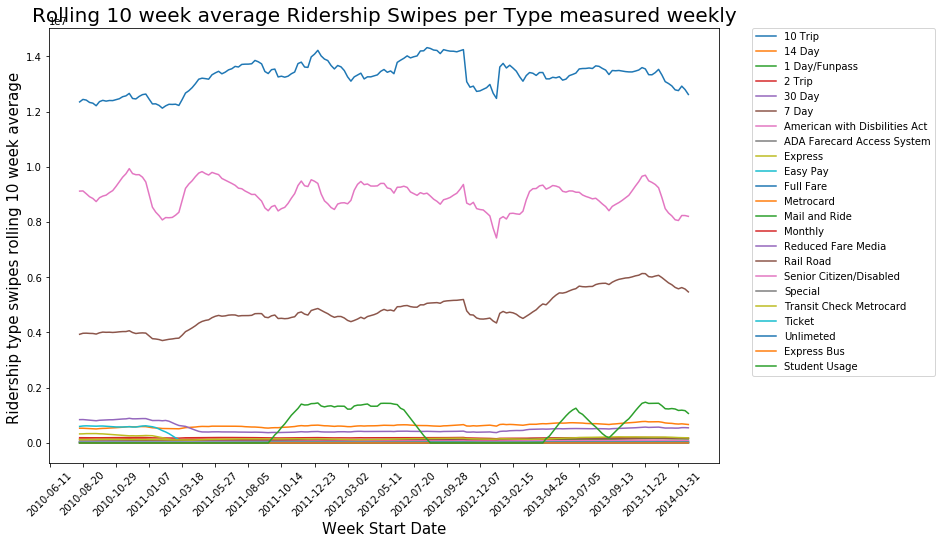

In [537]:
plt.figure(figsize=(12,8))

plt.plot((Ridershipdf));
plt.xticks(arange(0,194,10), dates[::10], rotation=45 );
plt.xlabel('Week Start Date',fontsize=15)
plt.ylabel('Ridership type swipes rolling 10 week average ',fontsize=15)
plt.title('Rolling 10 week average Ridership Swipes per Type measured weekly',fontsize=20)
plt.legend(ridetype,bbox_to_anchor=(1.05, 1), loc=2, 
           borderaxespad=0.)

#### Figure 4: Rolling 10 week average of Ridership Swipes per Type measured weekly
Note how the lines have clearer definition in terms of trend, we could also use a rolling average for the logarithmic data.

In [521]:
Ridershiplogdf = pd.DataFrame(np.log10(ridershipmean.T))

In [522]:
for i in range(23):
    Ridershiplogdf[i] = pd.rolling_mean(Ridershiplogdf[i], 10)
    
Ridershiplogdf.head(10)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
  from ipykernel import kernelapp as app


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


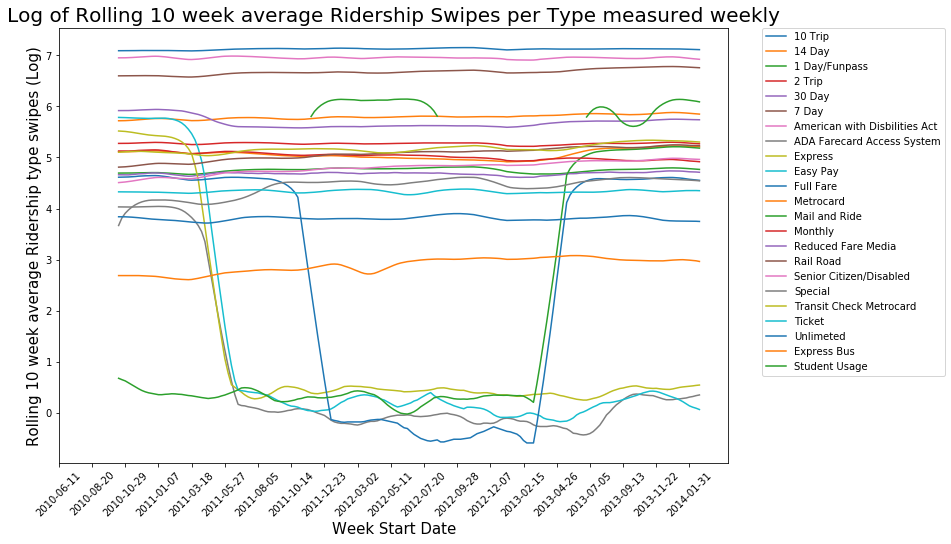

In [523]:
plt.figure(figsize=(12,8))

plt.plot(Ridershiplogdf);
plt.xticks(arange(0,194,10), dates[::10], rotation=45 );
plt.xlabel('Week Start Date',fontsize=15)
plt.ylabel('Rolling 10 week average Ridership type swipes (Log)',fontsize=15)
plt.title('Log of Rolling 10 week average Ridership Swipes per Type measured weekly',fontsize=20)
plt.legend(ridetype,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Figure 5: Log of Rolling 10 week average Ridership Swipes per Type measured weekly
Note how there are even cleaer trend lines. We can clearly see ridership tyupes that drop off and those that start from near nothing.

In [538]:
for i in range(23):
    
    print( 'The AD Fuller test results for ' + str(ridetype[i]) + ' is ' + str(sm.tsa.adfuller(ridership.T[i])) +'\n' )

The AD Fuller test results for 10 Trip is (-3.7284679662849571, 0.0037300862571053887, 8, 14, {'1%': -4.0120336005830897, '5%': -3.1041838775510207, '10%': -2.6909873469387753}, 327.35479726371824)

The AD Fuller test results for 14 Day is (-4.1516134315929536, 0.00079480967471692865, 8, 14, {'1%': -4.0120336005830897, '5%': -3.1041838775510207, '10%': -2.6909873469387753}, 328.02556899202807)

The AD Fuller test results for 1 Day/Funpass is (-4.2699375600531528, 0.00050058174531064778, 8, 14, {'1%': -4.0120336005830897, '5%': -3.1041838775510207, '10%': -2.6909873469387753}, 327.92952077470648)

The AD Fuller test results for 2 Trip is (-4.2177354425424687, 0.00061480330262091078, 8, 14, {'1%': -4.0120336005830897, '5%': -3.1041838775510207, '10%': -2.6909873469387753}, 327.77215300498909)

The AD Fuller test results for 30 Day is (-4.080304400834355, 0.0010437292336275808, 8, 14, {'1%': -4.0120336005830897, '5%': -3.1041838775510207, '10%': -2.6909873469387753}, 326.80295991461122)



#### The Ad fuller test for all the different ridership types
We can see which ridership types are stationary by looking athe the statistic, and if it below the point for a signifigance of 0.05. We can reject the null that the series has a unit root and is non-stationary if the value is below the significance level.

Express is the only non-stationary value

## Task 3:
### Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

In [299]:
stations.shape

(600, 194)

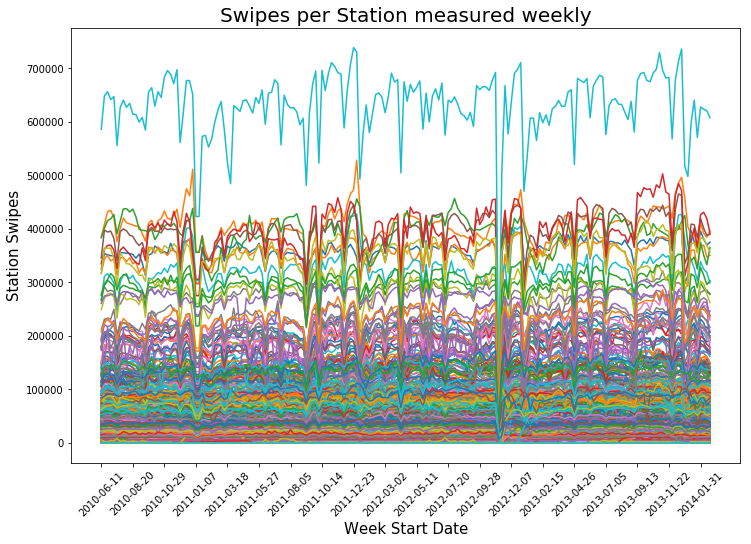

In [310]:
plt.figure(figsize=(12,8))

plt.plot((stations.T));
plt.xticks(arange(0,194,10), dates[::10], rotation=45 );
plt.xlabel('Week Start Date',fontsize=15)
plt.ylabel('Station Swipes',fontsize=15)
plt.title('Swipes per Station measured weekly',fontsize=20);

#### Figrue 6: Sipes per Station
Note how there is a lot of variatyyion with some stations having a lot of swipes on average, possibly because they are in more populous and busy areas.

(4, 6.1620396350599904)

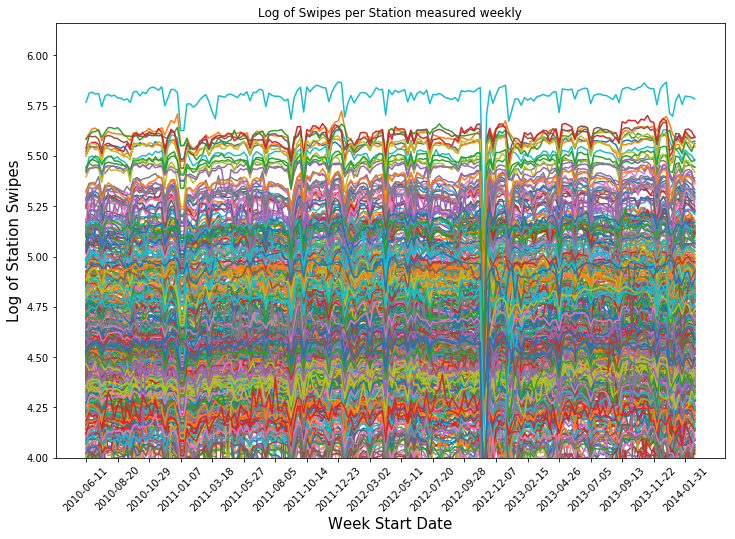

In [307]:
plt.figure(figsize=(12,8))

plt.plot((np.log10(stations.T)));
plt.xticks(arange(0,194,10), dates[::10], rotation=45 );
plt.xlabel('Week Start Date',fontsize=15)
plt.ylabel('Log of Station Swipes',fontsize=15)
plt.title('Log of Swipes per Station measured weekly')
plt.ylim(4)

#### Figure 7: Logarithm of the Sqipes per station,
Note how this eliminates the bunching of the smaller data sets

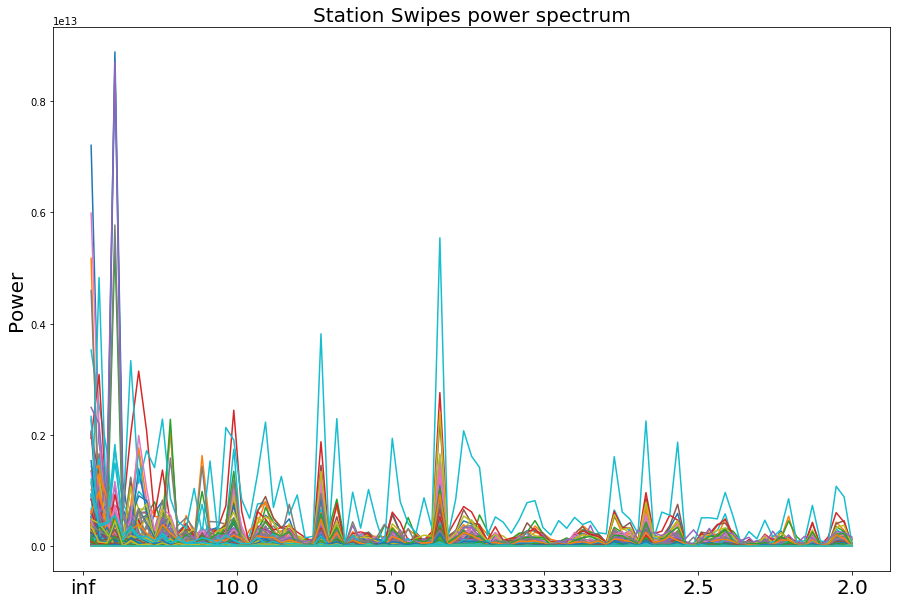

In [539]:
fig = plt.figure(figsize=(15,10))
ax=fig.add_subplot(111)

for i in range(600):
    f = np.abs(np.fft.rfft(stations[i]))**2
    N = len(stations[i])
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
    # Data point is at 4 so we only need to evaluate the 4th point
    

# changing the labels on the x ticks to see the period instead of frequency
ax.set_ylabel("Power", fontsize=20)
#ax.set_xlim(1/194,0.1)
#ax.set_ylim(5.5e12)
ax.set_xticklabels(["%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
plt.title("Station Swipes power spectrum", fontsize=20);

#### Figure 8: Station Sqipes Power Spectrum 
This helps to identify any periodicity in the data sets, there are clear common features such as around 4, 8 and 12 weeks. We need to zoom into 52 weeks to identify annual periodicity 

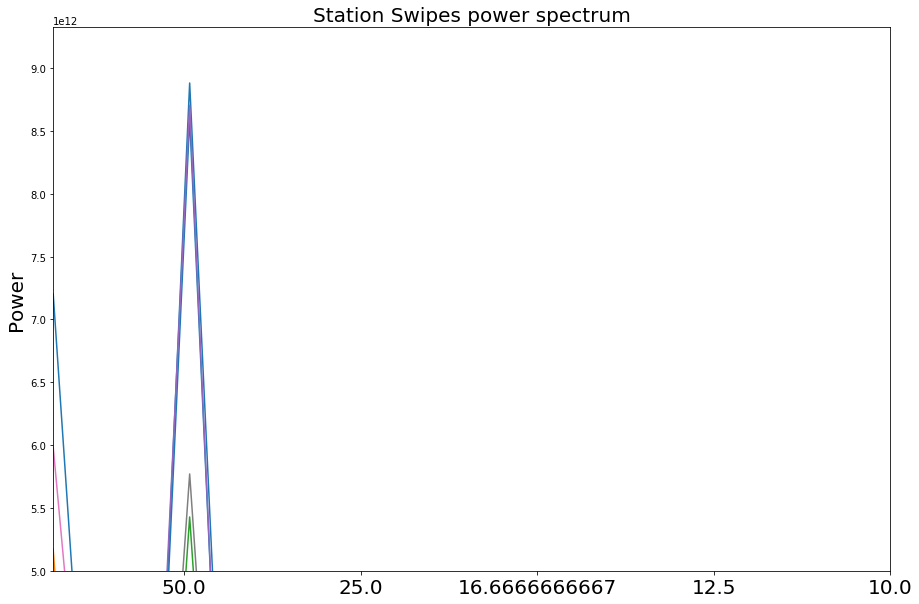

In [540]:
fig = plt.figure(figsize=(15,10))
ax=fig.add_subplot(111)
array=[]

for i in range(600):
    f = np.abs(np.fft.rfft(stations[i]))**2
    N = len(stations[i])
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
    # Data point is at 4 so we only need to evaluate the 4th point
    if f[4] >= 5.5e12:
        array.append(i)

# changing the labels on the x ticks to see the period instead of frequency
ax.set_ylabel("Power", fontsize=20)
ax.set_xlim(1/194,0.1)
ax.set_ylim(5e12)
ax.set_xticklabels(["%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
plt.title("Station Swipes power spectrum", fontsize=20);

#### Figure 9: Station Swipes power spectrum for zoomed in data
We can clearly see the data points with periodicity around the 50 week mark. I am unsure why these 4 stations would have periodicity over 1 year, it may be due to things such as an annual holiday or a specific festival or event such as a parade or similar

In [472]:
array

[0, 150, 194, 327]

In [474]:
print('The stations that show annual periodicity are stations ' + str(array))

The stations that show annual periodicity are stations [0, 150, 194, 327]


## Task 1: 
### Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
### Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.


## Task 2: 
### Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)


## Task 3:
### Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)


## EXTRA CREDIT: Cluster. 
### Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis). 
### Since this is extra credit I will leave it to you to figure out the details, but for KMeans for e.g. if you use the sklearn.cluster package it would look something like:

i am flattening the first 2 dimensions of the cube to cluster all light curves for all stations and all types

```
tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T
```

removing empty light curves

```
tots = tots[tots.std(1)>0]
```

with Kmeans you have to choose the number of clusters ahead km = 

```
KMeans(n_clusters=10)
```

and standardize the lightcurves before clustering. Notice: standardize, not whiten! If you have done clustering before you may have whitened the data: removed the variance by "column", here you want to remove the variance by "row". We will discuss this in the clustering lecture. 
```
vals = ((tots.T - tots.mean(1))/tots.std(1)).T
```

then you can run:

```
km.fit(vals)
```

# HINTS: 

## notes and hints: 

   1) you could coerce the data into a pandas dataframe, but the data is truly a "datacube": a 3D dataset, and flattening it into a pandas dataframe will make it far more difficult to manipulate. I strongly recommand you keep it as a numpy array
    
   2) note that the missing values are inputted as -1. if you want to do things like algebra (summing time series for example) you need to take care of that. If you replace the -1 entries with NaN, you may need to use functions that explicitly know how to deal with NaN: for example, to sum use the np.nansum etc
```
np.nanmean(mtarides)
np.nansum(mtarides)
```
as opposed to just 
```
np.mean(mtarides)
np.sum(mtarides)
```
 
## There are 600 stations, 23 card types. The trick to do this homework succesfully is to "collaps" (by averaging, or summing, depending on the question) the appropriate dimension in different parts of the homework: when you need to work at the station level (if I ask "which station is the one that..."), collaps the card type, when you need to work on the card type, collapse the stations. 

When I ask you "which station ...", you can sum or average over the ridership types for all station and reduce your data by a factor 23. When I ask you "which rideship type ..." you can sum or average over the stations and reduce your data by a factor 600! (or even better you could take a weighted average - *np.average(....weight=...)* -. The sum and average functions take an *axis* argument, which allows you to control which axis of the cube gets averaged. The dimension of the resulting object will allow you to check that you averaged over the right axis.


# Possibly useful functions

You are already familiar with and have already used  most of the functions I needed to perform this exercise. Here are some reminders and on few functions and methods that you may not have encountered yet which may be useful. You do not have to use them: there are many ways to do things and you do not have to solve this problem like I did, but here they are in case you need some help:

* the numpy function np.where() returns the index where a condition is true. It is slow and inefficient but very intuitive and convenient


* the nupy functions np.nansum(), np.sum(), np.nanmean() etc take an array and the axis along which to sum as inputs. If you want to sum over stations, or over rides, you can use these passing the appropriate axis number: axis=1 axis=2...


* to find periodicity you can use fourier transforms. Look at the notebook on fourier transforms in https://github.com/fedhere/UInotebooks/tree/master/timeseries. If you choose to use the numpy package you may want to use the real fft function:  np.fft.rfft()  

```
np.fft.rfft(mydata) 
```  

      will return the *real* part of the fourier transform (the fourier transform is a *complex* object, and therefore it has a real and an *imaginary* component - that is just math; all you need to know is that you need the real part). But what you want is its absolute value: np.abs(). 
      To plot the fourier transform you may want the x-axis to be in frequency. To get the x-axis of your plot in frequency (1/week since the data is in weeks) you can use the function 

```
np.fft.rfftfreq(N, d) 
```     
     which takes as arguments N = the length of your time series (the number of datapoints) and d: the *sample spacing*, or 1.0/sampling_rate (in this case, with 1/week sampling, if you want the freq in units of week that is just 1!)


*  the array methods 
```
np.array.flatten()
np.array.reshape()
```
     allow you to manipulate the shape of an array, for example if you want to run analysis on each individual time series, each station and each ridership type, which I recommand if you want to work on clustering for extra credit (resulting into 600*23=13800 time series) you can flatten the array as
     
```
mtaarray.flatten()
```

    which returns the flatten array:

```
mtaRides = np.load("MTA_Fare.npy")

mtaRides.shape
Out[10]: (600, 23, 194)

mtaRides.flatten().shape
Out[11]: (2677200,)
````

*  after you operate on the array to collapse an axis, always check the dimensionality to assure you have indeed collapsed the right axis! see cell below

```
import numpy as np
data = np.random.rand(100,10)

print(data.shape)
Out[12]: (100, 10)

print(data.mean())
Out[13]:  0.4902457782

print(data.mean(axis=0).shape, data.mean(axis=1).shape)
Out[14]: (10,) (100,)

```

In [2]:
#after reading the datacube you should see:
mtaRides.shape


(600, 23, 194)

ride types list

In [6]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [9]:
#after that I create a date range (for example with pd.date_range())
#in a log plot to enhance the visibility along the y axis (np.log10(weightedrides[i]))
#all time series, each station each ride type, look like this (pretty ugly)

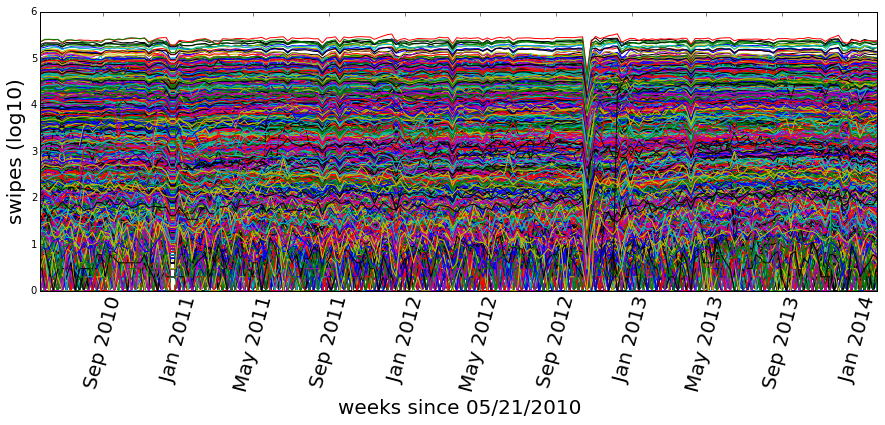

In [6]:
#as described in the instruction for some of the analysis 
#one can sum time series for all stations
print (mtaRide.shape)
mta_allsum = np.nansum(mtaRides, axis=0)
print (mta_allsum.shape)
#or for all ride types
mta_allsum = np.nansum(mtaRides, axis=1)
print (mta_allsum.shape)



(600, 23, 194)
(23, 194)
(600, 194)


## NOTE ON THE TREND DETECTION:
### you should find the *card type* that has the steepest increase, and the steepest decrease. Notice: we are looking for something that has a more or less constant trend

### to do this you can sum or average (a weighted average is probably best) over all stations, leaving you with 23 time series, one per ridership type. 

### you can use a rolling mean for smoothing (pd.rolling_mean() for example), and you can calculate the ratio of the *number of rides* near the beginning to the *number of rides* near the end of the time series.

### notice that you should inspect the time series, algorithmically or at least by eye, to ensure you see a trend, and not just changing structure. Below is an example of a lightcurve with structure (top) and a lightcurve with a constant trend (bottom) both showing a large deviation between the beginning and the end of the time series

std: 153167.095823 
flux ratio beginning to end 1.53960256599
std: 33307.6081244 
flux ratio beginning to end 0.378670623705


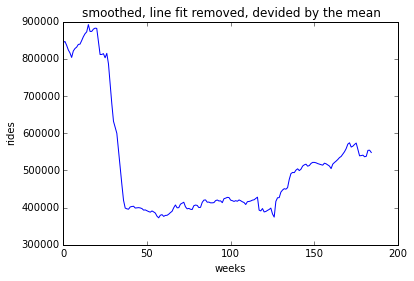

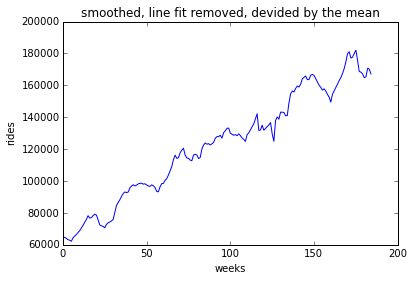

to determine if there is a trend or strucutre you can inspect the time series visually, since there are only 23!
an alternative, algorithmic way to do it, is to fit a line to the (smoothed) time series  and look at the residuals.

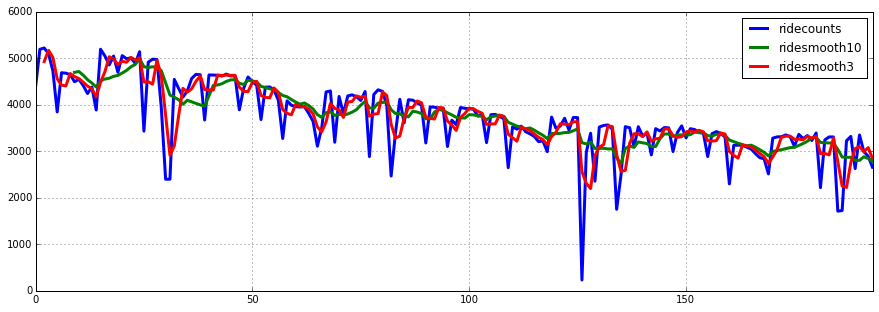

In [14]:
#here is an example of an individual time series that shows a trend, 
#after smoothing by 3 and 10 weeks

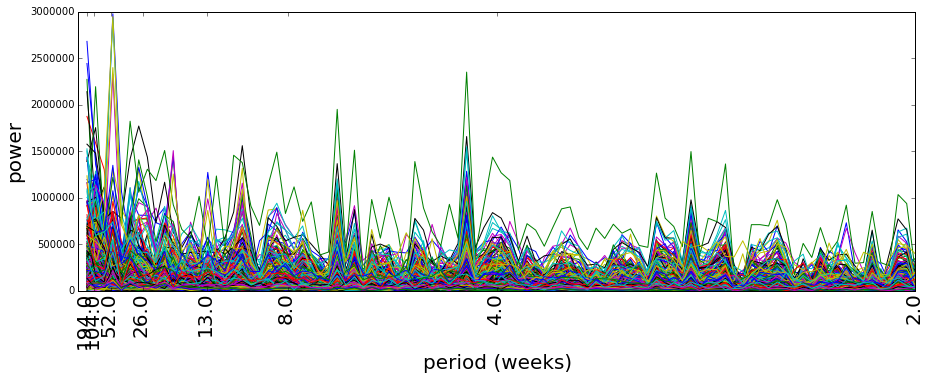

In [51]:
# this is a "power spectrum": the plot of the absolute value of the fourier transform. 
# I changed the xtick labels from frequecy (1/week) to period (in weeks)
# to facilitate the visual identification of the 1-year period peak
# (notice however that np.fft.rfftfreq(N, d)  returns frequency, the inverse of the period: frequency = 1/period. 
# All I did was changing the tick labels): 

...
ax.set_xticklabels([ "%s"%(1/f) for f in allperiods], rotation=90)

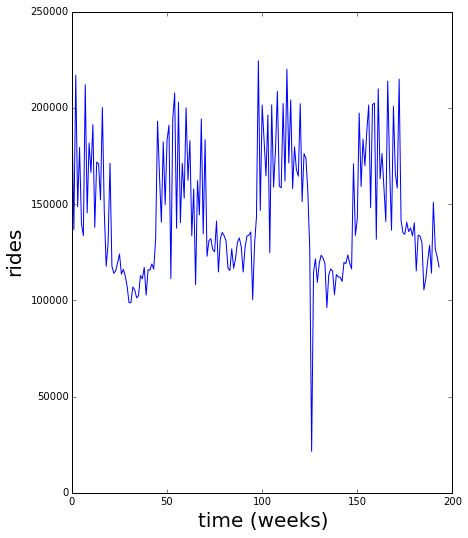

In [63]:
#and here is one of he periodic time series you should find by identifying the time series with the most power 
#at 1/52 weeks frequency in fourier space

## ASH Score 100. Extra CRedit 0